In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

import matplotlib.pylab as plt
import seaborn as sns 
import os 
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fm.get_fontconfig_fonts()
font_location = "C:/Users/User/bigdata/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

FileNotFoundError: ignored

In [3]:
df_train = pd.read_excel("/content/2020new_train.xlsx")
df_test = pd.read_excel("/content/2020new_test.xlsx")

In [53]:
df_train.head()

,세부주소,단지명,정부청사거리,층,계약년월,건축년도,주택매매가격지수,COFIX,금리,부동산심리지수,전입인구,소비자물가지수,교육시설,아파트전세가격지수,국고채,SNS긍정률,전용면적,도시형생활주택,보증금
0,세종특별자치시 고운동 가-,가락마을 19단지,3.81209,5,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,84.6972,0,24000
1,세종특별자치시 고운동가-,가락마을 19단지,3.81209,2,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,84.9544,0,21000
2,세종특별자치시 고운동가-,가락마을 19단지,3.81209,10,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,59.6506,0,15000
3,세종특별자치시 고운동가-,가락마을 19단지,3.81209,7,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,105.7788,0,18000
4,세종특별자치시 고운동가-,가락마을 19단지,3.81209,11,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,105.6138,0,23000


In [5]:
df_test.head()

,세부주소,단지명,정부청사거리,층,계약년월,건축년도,주택매매가격지수,COFIX,금리,부동산심리지수,전입인구,소비자물가지수,교육시설,아파트전세가격지수,국고채,SNS긍정률,전용면적,도시형생활주택,보증금
0,세종특별자치시 새롬동 74-47,새뜸마을12단지(금성백조예미지),2.24918,13,201905,2017,1.01,2.01,1.84,97.3,5038,105.05,1,102.4,1.587,0.465928,59.9283,0,17500
1,세종특별자치시 새롬동 74-47,새뜸마을12단지(금성백조예미지),2.24918,24,201905,2017,1.01,2.01,1.84,97.3,5038,105.05,1,102.4,1.587,0.465928,84.9936,0,20000
2,세종특별자치시 새롬동 74-47,새뜸마을12단지(금성백조예미지),2.24918,8,201905,2017,1.01,2.01,1.84,97.3,5038,105.05,1,102.4,1.587,0.465928,59.9283,0,15000
3,세종특별자치시 새롬동 74-47,새뜸마을12단지(금성백조예미지),2.24918,6,201905,2017,1.01,2.01,1.84,97.3,5038,105.05,1,102.4,1.587,0.465928,84.9738,0,20000
4,세종특별자치시 새롬동 74-47,새뜸마을12단지(금성백조예미지),2.24918,4,201905,2017,1.01,2.01,1.84,97.3,5038,105.05,1,102.4,1.587,0.465928,59.9283,0,15000


In [6]:
df_train.shape, df_test.shape

((11620, 19), (3471, 19))

In [7]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index      # 수치형 변수 11개
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index  # 명목형 변수 2개
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  17
Number of Categorical features:  2


In [8]:
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

Index(['정부청사거리', '층', '계약년월', '건축년도', '주택매매가격지수', 'COFIX', '금리', '부동산심리지수',
       '전입인구', '소비자물가지수', '교육시설', '아파트전세가격지수', '국고채', 'SNS긍정률', '전용면적',
       '도시형생활주택', '보증금'],
      dtype='object')
********************************************************************************
Index(['세부주소', '단지명'], dtype='object')


In [9]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

Outliers_to_drop = detect_outliers(df_train, 2, ['정부청사거리', '층', '계약년월', '건축년도', '주택매매가격지수', 'COFIX', '금리', '부동산심리지수',
       '전입인구', '소비자물가지수', '교육시설', '아파트전세가격지수', '국고채', 'SNS긍정률', '전용면적','도시형생활주택',])


In [10]:
df_train.loc[Outliers_to_drop]

,세부주소,단지명,정부청사거리,층,계약년월,건축년도,주택매매가격지수,COFIX,금리,부동산심리지수,전입인구,소비자물가지수,교육시설,아파트전세가격지수,국고채,SNS긍정률,전용면적,도시형생활주택,보증금
2364,세종특별자치시 부강면 부강리498-7,대신하나로,9.322033,6,202006,2002,114.0,1.55,0.79,134.3,4598,104.87,4,113.4,0.842,0.624903,59.8600,0,5000
2366,세종특별자치시 부강면 부강리973-13,블루빌,9.143209,4,202006,2019,114.0,1.55,0.79,134.3,4598,104.87,4,113.4,0.842,0.624903,23.4947,1,6000
2769,세종특별자치시 소정면 운당리35-1,무궁화,23.844625,10,202007,1996,120.2,1.48,0.79,150.9,5109,104.86,2,118.2,0.796,1.232514,59.4000,0,6000
3308,세종특별자치시 연동면 명학리255,다산청정,7.693929,3,202002,2001,105.2,1.75,1.42,133.7,8900,150.80,3,106.6,1.104,0.613849,59.8580,0,5000
3309,세종특별자치시 연동면 명학리255,다산청정,7.693929,10,202002,2001,105.2,1.75,1.42,133.7,8900,150.80,3,106.6,1.104,0.613849,59.8580,0,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,세종특별자치시 도담동656,까사리움,1.427659,7,202002,2015,105.2,1.75,1.42,133.7,8900,150.80,12,106.6,1.104,0.613849,18.2700,1,8000
1979,세종특별자치시 도담동664,라온프라이빗시티 Ⅰ,1.185742,8,202002,2014,105.2,1.75,1.42,133.7,8900,150.80,12,106.6,1.104,0.613849,19.1676,1,8400
1981,세종특별자치시 도담동664,라온프라이빗시티 Ⅰ,1.185742,3,202002,2014,105.2,1.75,1.42,133.7,8900,150.80,12,106.6,1.104,0.613849,20.9400,1,8000
1996,세종특별자치시 도담동666,라온프라이빗시티 Ⅱ,1.119684,4,202002,2014,105.2,1.75,1.42,133.7,8900,150.80,12,106.6,1.104,0.613849,19.6200,1,8000


In [11]:
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_train.shape

(10859, 19)

In [12]:
for col in df_train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)

column:       세부주소	 Percent of NaN value: 0.00%
column:        단지명	 Percent of NaN value: 0.00%
column:     정부청사거리	 Percent of NaN value: 0.00%
column:          층	 Percent of NaN value: 0.00%
column:       계약년월	 Percent of NaN value: 0.00%
column:       건축년도	 Percent of NaN value: 0.00%
column:   주택매매가격지수	 Percent of NaN value: 0.00%
column:      COFIX	 Percent of NaN value: 0.00%
column:         금리	 Percent of NaN value: 0.00%
column:    부동산심리지수	 Percent of NaN value: 0.00%
column:       전입인구	 Percent of NaN value: 0.00%
column:    소비자물가지수	 Percent of NaN value: 0.00%
column:       교육시설	 Percent of NaN value: 0.00%
column:  아파트전세가격지수	 Percent of NaN value: 0.00%
column:        국고채	 Percent of NaN value: 0.00%
column:     SNS긍정률	 Percent of NaN value: 0.00%
column:       전용면적	 Percent of NaN value: 0.00%
column:    도시형생활주택	 Percent of NaN value: 0.00%
column:        보증금	 Percent of NaN value: 0.00%


In [13]:
for col in df_test.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msperc)

column:       세부주소	 Percent of NaN value: 0.00%
column:        단지명	 Percent of NaN value: 0.00%
column:     정부청사거리	 Percent of NaN value: 0.00%
column:          층	 Percent of NaN value: 0.00%
column:       계약년월	 Percent of NaN value: 0.00%
column:       건축년도	 Percent of NaN value: 0.00%
column:   주택매매가격지수	 Percent of NaN value: 0.00%
column:      COFIX	 Percent of NaN value: 0.00%
column:         금리	 Percent of NaN value: 0.00%
column:    부동산심리지수	 Percent of NaN value: 0.00%
column:       전입인구	 Percent of NaN value: 0.00%
column:    소비자물가지수	 Percent of NaN value: 0.00%
column:       교육시설	 Percent of NaN value: 0.00%
column:  아파트전세가격지수	 Percent of NaN value: 0.00%
column:        국고채	 Percent of NaN value: 0.00%
column:     SNS긍정률	 Percent of NaN value: 0.00%
column:       전용면적	 Percent of NaN value: 0.00%
column:    도시형생활주택	 Percent of NaN value: 0.00%
column:        보증금	 Percent of NaN value: 0.00%


In [14]:
corr_data = df_train[['정부청사거리', '층', '계약년월', '건축년도', '주택매매가격지수', 'COFIX', '금리', '부동산심리지수',
       '전입인구', '소비자물가지수', '교육시설', '아파트전세가격지수', '국고채', 'SNS긍정률', '전용면적','도시형생활주택','보증금']]

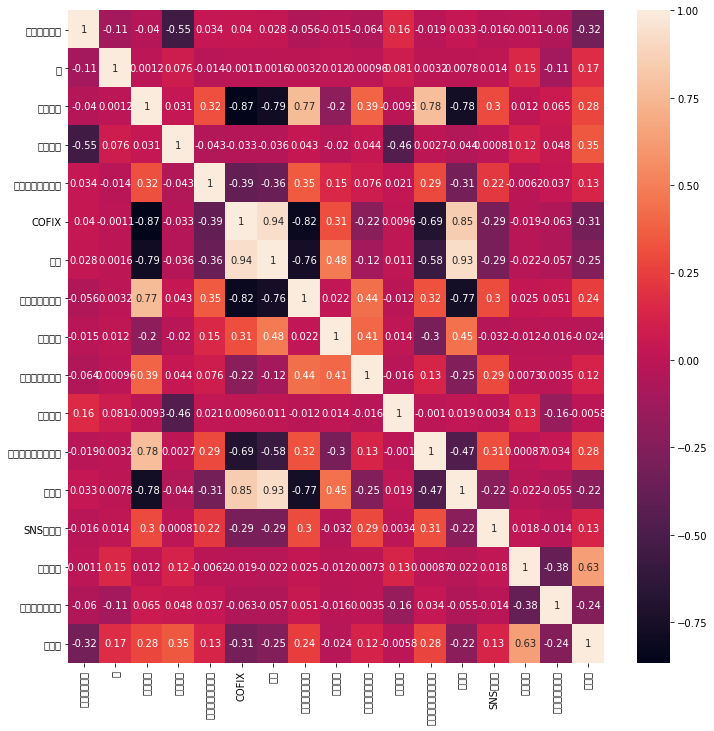

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_data.corr(), annot=True)
plt.show()

In [16]:
df_train.drop(['세부주소','단지명','COFIX','계약년월','소비자물가지수','아파트전세가격지수','건축년도','금리','부동산심리지수'], axis=1)
df_test.drop(['세부주소','단지명','COFIX','계약년월','소비자물가지수','아파트전세가격지수','건축년도','금리','부동산심리지수'], axis=1)

,정부청사거리,층,주택매매가격지수,전입인구,교육시설,국고채,SNS긍정률,전용면적,도시형생활주택,보증금
0,2.249180,13,1.01,5038,1,1.587,0.465928,59.9283,0,17500
1,2.249180,24,1.01,5038,1,1.587,0.465928,84.9936,0,20000
2,2.249180,8,1.01,5038,1,1.587,0.465928,59.9283,0,15000
3,2.249180,6,1.01,5038,1,1.587,0.465928,84.9738,0,20000
4,2.249180,4,1.01,5038,1,1.587,0.465928,59.9283,0,15000
...,...,...,...,...,...,...,...,...,...,...
3466,3.243743,20,101.30,7248,6,1.360,0.458615,101.4500,0,19000
3467,3.243743,25,101.30,7248,6,1.360,0.458615,84.8100,0,17000
3468,3.243743,8,101.30,7248,6,1.360,0.458615,114.8400,0,21000
3469,3.243743,16,101.30,7248,6,1.360,0.458615,114.6100,0,25000


In [17]:
x_final = df_train[['층', '정부청사거리','COFIX',
       'SNS긍정률', '전용면적', '도시형생활주택']]

In [18]:
x_final

,층,정부청사거리,COFIX,SNS긍정률,전용면적,도시형생활주택
0,5,3.812090,1.78,0.553994,84.6972,0
1,2,3.812090,1.78,0.553994,84.9544,0
2,10,3.812090,1.78,0.553994,59.6506,0
3,7,3.812090,1.78,0.553994,105.7788,0
4,11,3.812090,1.78,0.553994,105.6138,0
...,...,...,...,...,...,...
10854,20,3.243743,1.81,0.458615,101.4500,0
10855,25,3.243743,1.81,0.458615,84.8100,0
10856,8,3.243743,1.81,0.458615,114.8400,0
10857,16,3.243743,1.81,0.458615,114.6100,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

target_label = df_train["보증금"].values
X_test = df_test.values
X_tr, X_vld, y_tr, y_vld = train_test_split(x_final, target_label, test_size = 0.2, random_state = 2000)


In [ ]:
# 중요도 따지기 위한 모델


target_label = df_train["보증금"].values
X_test = df_test.values
X_tr, X_vld, y_tr, y_vld = train_test_split(x_final, target_label, test_size = 0.2, random_state = 2000)


In [20]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(X_tr,y_tr)

[16:59:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=1.8, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, ntrhead=-1, objective='reg:linear',
             random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.52, verbosity=1)

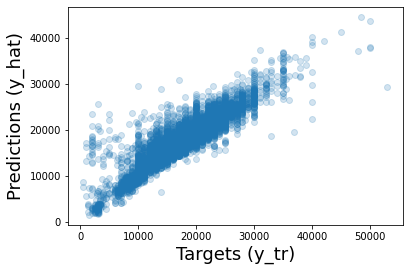

In [21]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [22]:
regressor.score(X_tr,y_tr)

0.80945109481366

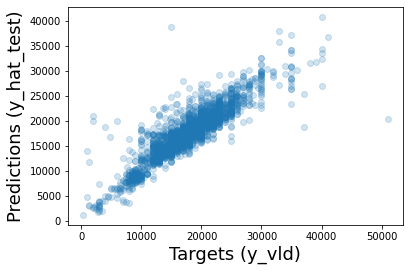

In [23]:
y_hat_test = regressor.predict(X_vld)


plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [24]:
regressor.score(X_vld,y_vld)

0.7881116839045089

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 10)

[17:00:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [26]:
print(accuracies.mean())
print(accuracies.std())

0.7576365263569007
0.030955986312835644


In [35]:
apt = pd.read_excel("/content/2020new_보증금0.xlsx")
test_data = apt[['층', '정부청사거리','COFIX',
       'SNS긍정률', '전용면적', '도시형생활주택']]

In [55]:
apt2 = pd.read_excel("/content/2020new (2).xlsx")
test_data2 = apt2[['정부청사거리', '층', '계약년월', '건축년도', '주택매매가격지수', 'COFIX', '금리', '부동산심리지수',
       '전입인구', '소비자물가지수', '교육시설', '아파트전세가격지수', '국고채', 'SNS긍정률', '전용면적','도시형생활주택']]

In [36]:
use_logvals = 1

pred_xgb = regressor.predict(test_data)

sub_xgb = pd.DataFrame()

sub_xgb['보증금'] = pred_xgb

if use_logvals == 1:
    sub_xgb['보증금'] = np.exp(sub_xgb['보증금']) 

sub_xgb.to_csv('xgb.csv',index=False)

In [56]:
use_logvals = 1

pred_xgb2 = regressor.predict(test_data2)

sub_xgb2 = pd.DataFrame()

sub_xgb2['보증금'] = pred_xgb2

if use_logvals == 1:
    sub_xgb2['보증금'] = np.exp(sub_xgb2['보증금']) 

ValueError: ignored

In [37]:
target = apt["보증금"]

In [ ]:
target2 = apt2["보증금"]

In [38]:
pred_xgb = regressor.predict(test_data)

In [ ]:
pred_xgb2 = regressor.predict(test_data2)

In [39]:

my_test = pd.DataFrame(pred_xgb, columns = ["보증금"])
print(my_test)

              보증금
0    17576.667969
1    27692.080078
2    17817.800781
3    25617.960938
4    21098.720703
..            ...
177   4573.813965
178   2758.791992
179   8827.397461
180   6488.535156
181   6620.393066

[182 rows x 1 columns]


In [31]:
my_test.to_excel("xgb_result.xlsx")

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(my_test, target)

In [42]:
mse

15319629.586515993

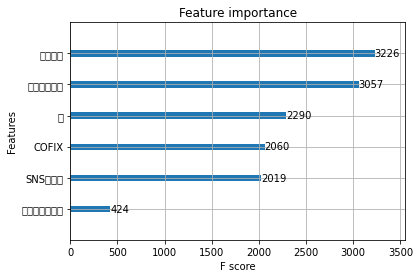

In [52]:
xgb.plot_importance(regressor)

In [60]:
import xgboost

In [62]:
imp = xgb.importance(regressor = regressor)

AttributeError: ignored